<a href="https://colab.research.google.com/github/adel-nouar/ML_with_Rune/blob/main/08%20-%20Project%20-%20Convolutional%20Neural%20Network%20(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Create a Convolutional Neural Network
- We will create a model on the [CIFAR-10 dataset](https://www.cs.toronto.edu/%7Ekriz/cifar.html)

### Step 1: Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Download the CIFAR10 dataset
- Excute the cell below

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


### Step 3: Normalize the pixels
- Divide the **train_images** and **test_images** with 255 to normalize them between 0 and 1.

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Step 4: Get the class names of the labels
- Make a class name conversion.
    - HINT: make a list with the name **class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']**
- How to use the name conversion.
    - **class_names[int(train_labels[index])]**
- How to show an image
    - **plt.imshow(train_images[index])**

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

'truck'

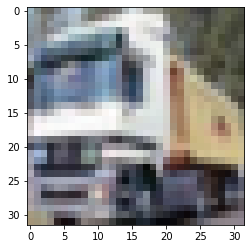

In [7]:
index = 1
plt.imshow(train_images[index])
class_names[int(train_labels[index])]

### Step 5: Create a model
- Create a **Sequential** model
    - **Conv2D** with 32 and (3, 3),  **activation='relu', input_shape=(32, 32, 3)**
    - **MaxPooling2D** with (2, 2)
    - **Conv2D** with 64 and (3, 3),  **activation='relu'**
    - **MaxPooling2D** with (2, 2)
    - **Conv2D** with 64 and (3, 3),  **activation='relu'**
    - **Flatten**
    - **Dense** with 64 nodes with **input_dim=4, activaition='relu'**
    - **Dense** with 10 (the output node)**
- Complie the model with **optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']**

In [20]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, input_dim=4, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Step 6: Train the model
- Fit the model with **train_images, train_labels, epochs=10** and **validation_data=(test_images, test_labels)**

In [10]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.5279 - accuracy: 0.4445 - val_loss: 1.2542 - val_accuracy: 0.5515
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1759 - accuracy: 0.5862 - val_loss: 1.1129 - val_accuracy: 0.6034
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0357 - accuracy: 0.6362 - val_loss: 1.0272 - val_accuracy: 0.6377
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9427 - accuracy: 0.6701 - val_loss: 0.9758 - val_accuracy: 0.6587
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8737 - accuracy: 0.6940 - val_loss: 0.9271 - val_accuracy: 0.6755
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8201 - accuracy: 0.7130 - val_loss: 0.9386 - val_accuracy: 0.6729
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7702 - accuracy: 0.7289 - val_loss: 0.9031 -

### Stpe 7: Test the model
- Make predictions
    - assign the predictions of test_images to a variable
- How to test visually
    - Assign **index=0**
    - Plot the image with **plt.imshow(test_images[index])**
    - See the label from prediction by mapping it from **class_names**

In [11]:
y_pred = model.predict(test_images)

'truck'

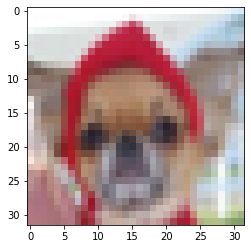

In [29]:
index = 168
plt.imshow(test_images[index])
class_names[y_pred[index].argmax()]

In [14]:
model.evaluate(test_images, test_labels, verbose=0)

[0.8937668800354004, 0.7041000127792358]

### Step 8 (Optional): Improve the model
- Try to play around with the model to improve the score

In [24]:
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, input_dim=4, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 118s 75ms/step - loss: 1.5193 - accuracy: 0.4463 - val_loss: 1.2221 - val_accuracy: 0.5644
Epoch 2/10
1563/1563 [==============================] - 118s 75ms/step - loss: 1.1580 - accuracy: 0.5904 - val_loss: 1.0792 - val_accuracy: 0.6183
Epoch 3/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.0012 - accuracy: 0.6466 - val_loss: 0.9870 - val_accuracy: 0.6507
Epoch 4/10
1563/1563 [==============================] - 118s 76ms/step - loss: 0.8989 - accuracy: 0.6832 - val_loss: 0.9544 - val_accuracy: 0.6678
Epoch 5/10
1563/1563 [==============================] - 118s 75ms/step - loss: 0.8196 - accuracy: 0.7117 - val_loss: 0.8906 - val_accuracy: 0.6938
Epoch 6/10
1563/1563 [==============================] - 118s 75ms/step - loss: 0.7631 - accuracy: 0.7318 - val_loss: 0.8667 - val_accuracy: 0.6994
Epoch 7/10
1563/1563 [==============================] - 118s 75ms/step - loss: 0.7124 - accuracy: 0.7482 - val_loss: 0

In [26]:
y_pred = model.predict(test_images)

'truck'

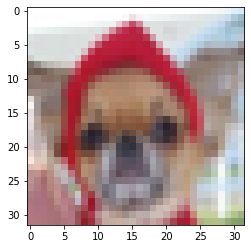

In [28]:
index = 168
plt.imshow(test_images[index])
class_names[y_pred[index].argmax()]

In [ ]:
model.evaluate(test_images, test_labels, verbose=0)